# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *


Bad key savefig.frameon in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
#tf.debugging.set_log_device_placement(True)
#tf.test.is_gpu_available()

In [7]:
tf.reset_default_graph()

In [8]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 20
env_name = 'FourRooms'  # Choose one of the environments shown above. 
resize_factor = 1  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/mgaltier200/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [9]:
from sgm.trainer import train_eval

train_eval(agent,
          tf_env,
          eval_tf_env,
          initial_collect_steps=1000,
          eval_interval=1000,
          num_eval_episodes=10,
          num_iterations=30000,
          save_model_dir=model_dir,
          experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  3%|▎         | 995/30000 [00:17<06:57, 69.43it/s] 

Saved checkpoint for step 1000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 2.266754
INFO:tensorflow:60.523 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.60
INFO:tensorflow:		 predicted_dist = 14.3 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.2 (0.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.50
INFO:tensorflow:		 predicted_dist = 17.2 (0.2)
INFO:tensorflow:	 eval_time = 3.44


  7%|▋         | 1997/30000 [00:37<07:37, 61.16it/s]  

Saved checkpoint for step 2000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 2.141474
INFO:tensorflow:66.430 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.30
INFO:tensorflow:		 predicted_dist = 12.4 (2.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -14.00
INFO:tensorflow:		 predicted_dist = 15.2 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.60
INFO:tensorflow:		 predicted_dist = 18.3 (0.4)
INFO:tensorflow:	 eval_time = 3.06


 10%|▉         | 2996/30000 [00:59<09:05, 49.52it/s]  

Saved checkpoint for step 3000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 2.758532
INFO:tensorflow:57.343 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 10.1 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.80
INFO:tensorflow:		 predicted_dist = 13.3 (2.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.20
INFO:tensorflow:		 predicted_dist = 16.9 (0.6)
INFO:tensorflow:	 eval_time = 3.54


 13%|█▎        | 3999/30000 [01:22<11:26, 37.85it/s]  

Saved checkpoint for step 4000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 3.258099
INFO:tensorflow:54.497 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 6.2 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -15.80
INFO:tensorflow:		 predicted_dist = 11.2 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.1 (1.0)
INFO:tensorflow:	 eval_time = 2.70


 17%|█▋        | 4999/30000 [01:45<10:56, 38.10it/s]  

Saved checkpoint for step 5000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 2.835186
INFO:tensorflow:54.113 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 4.8 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.40
INFO:tensorflow:		 predicted_dist = 9.8 (2.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.1 (1.9)
INFO:tensorflow:	 eval_time = 2.86


 20%|█▉        | 5998/30000 [02:09<08:16, 48.36it/s]  

Saved checkpoint for step 6000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 3.312639
INFO:tensorflow:51.740 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 5.4 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.40
INFO:tensorflow:		 predicted_dist = 10.8 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.20
INFO:tensorflow:		 predicted_dist = 15.7 (0.8)
INFO:tensorflow:	 eval_time = 2.90


 23%|██▎       | 6997/30000 [02:34<07:27, 51.45it/s]  

Saved checkpoint for step 7000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 2.923072
INFO:tensorflow:50.674 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.60
INFO:tensorflow:		 predicted_dist = 4.6 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.60
INFO:tensorflow:		 predicted_dist = 8.7 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.50
INFO:tensorflow:		 predicted_dist = 14.8 (1.1)
INFO:tensorflow:	 eval_time = 2.84


 27%|██▋       | 7994/30000 [02:58<07:05, 51.73it/s]  

Saved checkpoint for step 8000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 3.026661
INFO:tensorflow:51.310 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -6.60
INFO:tensorflow:		 predicted_dist = 5.3 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.40
INFO:tensorflow:		 predicted_dist = 8.9 (2.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.30
INFO:tensorflow:		 predicted_dist = 14.5 (1.4)
INFO:tensorflow:	 eval_time = 2.63


 30%|██▉       | 8994/30000 [03:23<06:58, 50.19it/s]

Saved checkpoint for step 9000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 3.077416
INFO:tensorflow:50.160 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.10
INFO:tensorflow:		 predicted_dist = 4.6 (2.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.30
INFO:tensorflow:		 predicted_dist = 9.1 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 16.2 (1.2)
INFO:tensorflow:	 eval_time = 2.43


 33%|███▎      | 9997/30000 [03:48<06:50, 48.68it/s]

Saved checkpoint for step 10000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 2.603526
INFO:tensorflow:49.903 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.70
INFO:tensorflow:		 predicted_dist = 4.3 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.20
INFO:tensorflow:		 predicted_dist = 7.7 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 15.5 (1.2)
INFO:tensorflow:	 eval_time = 3.24


 37%|███▋      | 10999/30000 [04:13<07:36, 41.60it/s]  

Saved checkpoint for step 11000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 2.935373
INFO:tensorflow:50.819 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.40
INFO:tensorflow:		 predicted_dist = 5.5 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.30
INFO:tensorflow:		 predicted_dist = 9.8 (2.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 15.3 (0.9)
INFO:tensorflow:	 eval_time = 2.49


 40%|███▉      | 11999/30000 [04:37<07:41, 39.01it/s]

Saved checkpoint for step 12000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 2.923965
INFO:tensorflow:51.765 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.90
INFO:tensorflow:		 predicted_dist = 4.5 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.90
INFO:tensorflow:		 predicted_dist = 8.7 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 15.0 (1.8)
INFO:tensorflow:	 eval_time = 2.85


 43%|████▎     | 12998/30000 [05:01<05:34, 50.85it/s]

Saved checkpoint for step 13000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 2.853809
INFO:tensorflow:51.720 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.40
INFO:tensorflow:		 predicted_dist = 5.4 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.00
INFO:tensorflow:		 predicted_dist = 9.2 (2.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.00
INFO:tensorflow:		 predicted_dist = 16.8 (0.7)
INFO:tensorflow:	 eval_time = 3.30


 47%|████▋     | 13998/30000 [05:26<06:00, 44.43it/s]

Saved checkpoint for step 14000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 2.699179
INFO:tensorflow:50.328 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 4.6 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.60
INFO:tensorflow:		 predicted_dist = 10.2 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.40
INFO:tensorflow:		 predicted_dist = 16.0 (1.1)
INFO:tensorflow:	 eval_time = 3.00


 50%|████▉     | 14995/30000 [05:51<05:18, 47.05it/s]

Saved checkpoint for step 15000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 2.579824
INFO:tensorflow:50.000 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.20
INFO:tensorflow:		 predicted_dist = 5.2 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.80
INFO:tensorflow:		 predicted_dist = 10.1 (2.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.10
INFO:tensorflow:		 predicted_dist = 15.7 (1.8)
INFO:tensorflow:	 eval_time = 2.99


 53%|█████▎    | 15998/30000 [06:16<04:53, 47.66it/s]

Saved checkpoint for step 16000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 2.717043
INFO:tensorflow:50.113 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.90
INFO:tensorflow:		 predicted_dist = 4.3 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.50
INFO:tensorflow:		 predicted_dist = 9.9 (2.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 13.8 (2.1)
INFO:tensorflow:	 eval_time = 3.70


 57%|█████▋    | 16997/30000 [06:42<04:34, 47.35it/s]

Saved checkpoint for step 17000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 2.675756
INFO:tensorflow:51.114 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.70
INFO:tensorflow:		 predicted_dist = 4.7 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.40
INFO:tensorflow:		 predicted_dist = 9.2 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.10
INFO:tensorflow:		 predicted_dist = 14.2 (1.6)
INFO:tensorflow:	 eval_time = 3.11


 60%|█████▉    | 17999/30000 [07:07<05:41, 35.16it/s]

Saved checkpoint for step 18000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 2.791984
INFO:tensorflow:49.986 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 3.4 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.60
INFO:tensorflow:		 predicted_dist = 8.8 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 14.4 (1.3)
INFO:tensorflow:	 eval_time = 3.66


 63%|██████▎   | 18997/30000 [07:33<03:57, 46.28it/s]

Saved checkpoint for step 19000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 2.854735
INFO:tensorflow:50.559 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 5.1 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.00
INFO:tensorflow:		 predicted_dist = 9.1 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.20
INFO:tensorflow:		 predicted_dist = 15.3 (1.0)
INFO:tensorflow:	 eval_time = 3.08


 67%|██████▋   | 19995/30000 [07:58<03:46, 44.19it/s]

Saved checkpoint for step 20000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 2.567674
INFO:tensorflow:50.157 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.80
INFO:tensorflow:		 predicted_dist = 3.6 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.60
INFO:tensorflow:		 predicted_dist = 8.4 (3.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.80
INFO:tensorflow:		 predicted_dist = 16.0 (1.5)
INFO:tensorflow:	 eval_time = 2.98


 70%|██████▉   | 20998/30000 [08:23<03:25, 43.77it/s]

Saved checkpoint for step 21000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 3.147943
INFO:tensorflow:50.331 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.90
INFO:tensorflow:		 predicted_dist = 4.8 (2.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.10
INFO:tensorflow:		 predicted_dist = 10.2 (2.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.20
INFO:tensorflow:		 predicted_dist = 15.8 (1.5)
INFO:tensorflow:	 eval_time = 3.18


 73%|███████▎  | 21996/30000 [08:48<03:07, 42.67it/s]

Saved checkpoint for step 22000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 2.490766
INFO:tensorflow:49.438 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.50
INFO:tensorflow:		 predicted_dist = 4.9 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.00
INFO:tensorflow:		 predicted_dist = 9.2 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.10
INFO:tensorflow:		 predicted_dist = 15.8 (2.3)
INFO:tensorflow:	 eval_time = 4.19


 77%|███████▋  | 22999/30000 [09:15<02:59, 39.04it/s]

Saved checkpoint for step 23000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 2.837080
INFO:tensorflow:49.235 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.60
INFO:tensorflow:		 predicted_dist = 5.1 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.80
INFO:tensorflow:		 predicted_dist = 9.0 (2.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.00
INFO:tensorflow:		 predicted_dist = 15.7 (1.2)
INFO:tensorflow:	 eval_time = 3.36


 80%|███████▉  | 23996/30000 [09:41<02:16, 43.97it/s]

Saved checkpoint for step 24000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 2.739185
INFO:tensorflow:50.141 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 3.6 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.70
INFO:tensorflow:		 predicted_dist = 9.0 (2.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 15.2 (1.5)
INFO:tensorflow:	 eval_time = 3.49


 83%|████████▎ | 24999/30000 [10:07<02:17, 36.42it/s]

Saved checkpoint for step 25000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 2.661529
INFO:tensorflow:49.510 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 2.7 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.50
INFO:tensorflow:		 predicted_dist = 8.5 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.80
INFO:tensorflow:		 predicted_dist = 13.9 (1.4)
INFO:tensorflow:	 eval_time = 3.84


 87%|████████▋ | 25999/30000 [10:34<01:59, 33.35it/s]

Saved checkpoint for step 26000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 2.647582
INFO:tensorflow:48.474 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.00
INFO:tensorflow:		 predicted_dist = 4.8 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -12.10
INFO:tensorflow:		 predicted_dist = 10.6 (2.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 14.3 (1.7)
INFO:tensorflow:	 eval_time = 3.26


 90%|████████▉ | 26997/30000 [10:59<01:09, 42.95it/s]

Saved checkpoint for step 27000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 2.590801
INFO:tensorflow:50.129 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.50
INFO:tensorflow:		 predicted_dist = 3.9 (2.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.60
INFO:tensorflow:		 predicted_dist = 9.2 (2.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 14.4 (1.5)
INFO:tensorflow:	 eval_time = 3.45


 93%|█████████▎| 27996/30000 [11:25<00:45, 43.59it/s]

Saved checkpoint for step 28000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 2.702123
INFO:tensorflow:49.220 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.50
INFO:tensorflow:		 predicted_dist = 5.5 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -13.50
INFO:tensorflow:		 predicted_dist = 10.5 (2.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.90
INFO:tensorflow:		 predicted_dist = 15.0 (1.3)
INFO:tensorflow:	 eval_time = 2.94


 97%|█████████▋| 28998/30000 [11:51<00:21, 46.55it/s]

Saved checkpoint for step 29000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 2.598050
INFO:tensorflow:48.921 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.30
INFO:tensorflow:		 predicted_dist = 5.4 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -15.00
INFO:tensorflow:		 predicted_dist = 9.2 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.00
INFO:tensorflow:		 predicted_dist = 14.5 (2.8)
INFO:tensorflow:	 eval_time = 3.45


100%|█████████▉| 29997/30000 [12:16<00:00, 44.16it/s]

Saved checkpoint for step 30000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-19-2021-03-41-07-PM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 2.557100
INFO:tensorflow:49.830 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.00
INFO:tensorflow:		 predicted_dist = 5.9 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.80
INFO:tensorflow:		 predicted_dist = 10.0 (3.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.60
INFO:tensorflow:		 predicted_dist = 15.6 (1.8)
INFO:tensorflow:	 eval_time = 3.16


100%|██████████| 30000/30000 [12:20<00:00, 40.54it/s]


LossInfo(loss=<tf.Tensor: id=1149306, shape=(), dtype=float32, numpy=2.5570998>, extra=(<tf.Tensor: id=1149307, shape=(), dtype=float32, numpy=0.4695647>, <tf.Tensor: id=1149308, shape=(), dtype=float32, numpy=2.0875351>))

# Load trained model into agent

In [10]:
filename = "FourRooms_coordinate_20steps-Dec-05-2019-12-58-28-PM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [11]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=np.inf)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

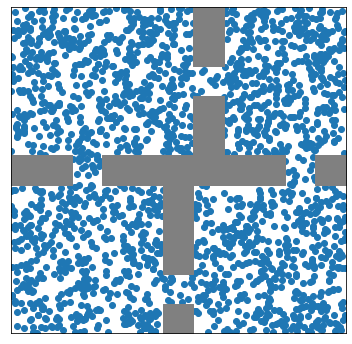

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [13]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

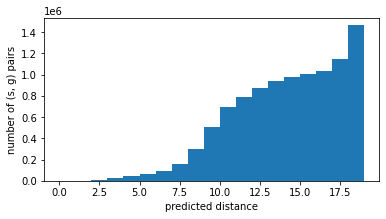

In [14]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Calculate Euclidean distances

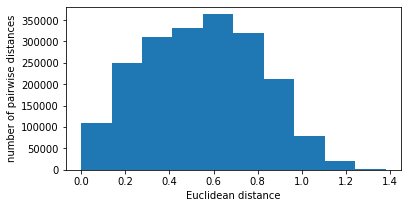

In [15]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SoRB search policy

In [16]:
from sgm.planner import SoRBSearchPolicy
search_policy_type = "SoRB"
agent.initialize_search(rb_vec, max_search_steps=6)
search_policy = SoRBSearchPolicy(agent, pdist, rb_vec)

# Cleanup and evaluate SoRB

In [17]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SoRB has initial success rate 0.45
Evaluated initial SoRB success rate in 567.12 seconds
After filtering and 0 cleanup steps, SoRB has success rate 0.25
Took 5000 cleanup steps and evaluated SoRB success rate in 4951.75 seconds
After filtering and 5000 cleanup steps, SoRB has success rate 0.30
Took 5000 cleanup steps and evaluated SoRB success rate in 3551.03 seconds
After filtering and 10000 cleanup steps, SoRB has success rate 0.30
Took 5000 cleanup steps and evaluated SoRB success rate in 3772.43 seconds
After filtering and 15000 cleanup steps, SoRB has success rate 0.20
Took 5000 cleanup steps and evaluated SoRB success rate in 4701.53 seconds
After filtering and 20000 cleanup steps, SoRB has success rate 0.10
After filtering and 25000 cleanup steps, SoRB has success rate 0.15
Took 5000 cleanup steps and evaluated SoRB success rate in 4092.43 seconds
After filtering and 30000 cleanup steps, SoRB has success rate 0.10
Took 5000 cleanup steps and evaluated SoRB success rate in 4177.7

# Load cleanup graphs

In [18]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

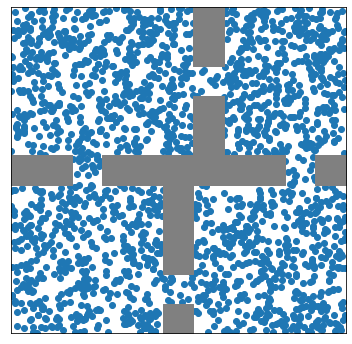

In [19]:
plot_points(search_policy.rb_vec, eval_tf_env)

Plotting 1946 nodes and 24055 edges


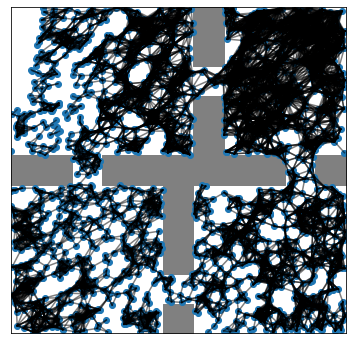

In [20]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

Plotting 1946 nodes and 9165 edges


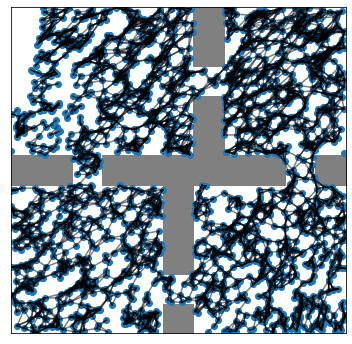

In [21]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

Plotting 1946 nodes and 9076 edges


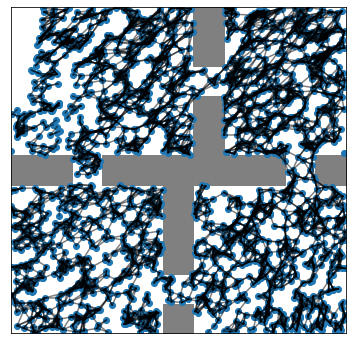

In [22]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

Plotting 1946 nodes and 89 edges


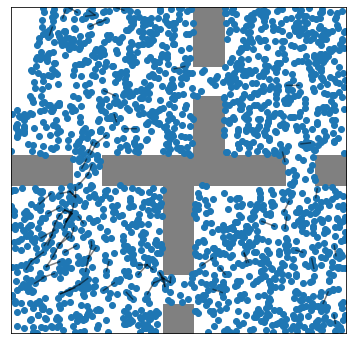

In [23]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)